#Métodos de Inicialização de Pesos

Os métodos de inicialização de pesos em redes neurais são técnicas utilizadas para definir os valores iniciais dos parâmetros de uma rede antes do treinamento.

A escolha da inicialização pode impactar diretamente a convergência do modelo, afetando a estabilidade do gradiente e a velocidade de aprendizado. Inicializações inadequadas podem levar a problemas como gradientes desaparecendo (vanishing gradients) ou gradientes explosivos (exploding gradients), dificultando o treinamento da rede.

Para mitigar esses problemas, diferentes estratégias foram desenvolvidas, como inicialização aleatória, Xavier/Glorot, He e até inicialização zero (que, apesar de ser um caso extremo, exemplifica a importância de um bom método).

O objetivo principal dessas abordagens é garantir que os pesos sejam pequenos o suficiente para evitar explosões de gradientes, mas suficientemente diversos para que diferentes neurônios aprendam representações distintas dos dados.



##Inicialização Aleatória

A inicialização aleatória de pesos é uma das estratégias mais simples utilizadas para definir os valores iniciais dos parâmetros em redes neurais antes do treinamento. Seu principal objetivo é evitar a simetria entre os neurônios, garantindo que cada um aprenda diferentes padrões dos dados. Se todos os pesos fossem inicializados com zero, os neurônios dentro de uma mesma camada receberiam gradientes idênticos, tornando-se redundantes e limitando a capacidade da rede. Para evitar esse problema, os pesos podem ser gerados aleatoriamente a partir de distribuições uniformes ou normais (gaussianas). Na distribuição uniforme, os pesos são amostrados dentro de um intervalo
[
−
𝑟
,
𝑟
]
, enquanto na distribuição normal, os pesos seguem uma distribuição gaussiana com média zero e um desvio padrão controlado. No entanto, a inicialização aleatória pura pode causar problemas como gradientes explosivos (se os valores dos pesos forem muito grandes) ou gradientes desaparecendo (se forem muito pequenos), dificultando o treinamento da rede. Além disso, a escolha inadequada da distribuição pode interagir negativamente com funções de ativação como sigmoid e tanh, levando a saturação e reduzindo a eficiência da retropropagação. Por conta dessas limitações, métodos mais avançados, como Xavier/Glorot e He, foram desenvolvidos para ajustar dinamicamente os valores iniciais dos pesos de acordo com a arquitetura da rede, otimizando a propagação dos gradientes e melhorando a estabilidade do treinamento.

###Formulas



A inicialização aleatória de pesos em redes neurais é essencial para evitar a simetria entre os neurônios e permitir um aprendizado eficaz. Para isso, dois métodos comuns de geração de pesos são a distribuição uniforme e a distribuição normal (gaussiana). Ambas são utilizadas para definir valores iniciais dos pesos antes do treinamento da rede, mas cada uma tem suas características específicas e aplicações ideais.

A inicialização uniforme define os pesos
𝑊
W dentro de um intervalo
[
−
𝑟
,
𝑟
]
, onde todos os valores dentro desse intervalo têm a mesma probabilidade de serem escolhidos. A fórmula geral para a distribuição uniforme é:

𝑊
∼
𝑈
(
−
𝑟
,
𝑟
)

Isso significa que os pesos são amostrados de uma distribuição uniforme no intervalo definido. A função densidade de probabilidade (PDF) dessa distribuição é dada por:

$$\
P(W) =
\begin{cases}
\frac{1}{2r}, & \text{se } -r \leq W \leq r \\
0, & \text{caso contrário}
\end{cases}$$

Ou seja, todos os valores dentro do intervalo possuem a mesma probabilidade
$ \frac{1}{2r} $ , garantindo que os pesos sejam distribuídos de maneira uniforme.

O valor de
𝑟 pode ser determinado empiricamente ou definido com base no número de neurônios na camada. Se os pesos forem muito grandes, podem causar exploding gradients; se forem muito pequenos, podem levar a vanishing gradients.

Essa inicialização tem algumas vantagens e desvantagens, como as seguintes:

Vantagem: Simplicidade e controle explícito sobre o intervalo dos pesos.

Desvantagem: Pode não ser ideal para funções de ativação como sigmoid e tanh, pois não leva em conta a variação do gradiente.



Outra abordagem comum é inicializar os pesos seguindo uma distribuição normal (gaussiana) com média zero e variância
𝜎
2
 , ou seja:

𝑊
∼
𝑁
(
0
,
𝜎
2
)

A função densidade de probabilidade (PDF) para a distribuição normal é:

$$
P(W) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{W^2}{2\sigma^2}}
$$

Isso significa que os pesos estarão concentrados em torno da média 0, com maior probabilidade de assumir valores próximos de zero e menos probabilidade de assumir valores extremos.

Escolha de
𝜎
: O desvio padrão
𝜎
 precisa ser ajustado para garantir que os gradientes não sejam muito grandes nem muito pequenos.
Existem algumas vantagens desse método de iniciação, e desventagens, descritas a seguir:

Vantagem: Apresenta Variância do Gradiente equilibrada entre as camadas, Melhor compatibilidade com redes profundas e algumas funções de ativação, além de  resolver o problema de Simetria entre Neurônios ao atribuir pesos ligeiramente diferentes para cada neurônio, permitindo que cada um aprenda representações distintas.

Desvantagem: Pode ser sensível ao valor escolhido para
𝜎
σ, exigindo ajuste cuidadoso.

##Inicialização Xavier/Glorot



A **inicialização Xavier/Glorot** foi introduzida por **Xavier Glorot e Yoshua Bengio** em 2010, no artigo *Understanding the difficulty of training deep feedforward neural networks*. Esse método foi desenvolvido para resolver os problemas de **vanishing gradients** (gradientes desaparecendo) e **exploding gradients** (gradientes explodindo), que frequentemente ocorrem em redes neurais profundas.

O objetivo da inicialização Xavier é manter a **variância dos pesos equilibrada** ao longo das camadas da rede, garantindo que os gradientes não se tornem muito grandes nem muito pequenos à medida que propagam durante o treinamento. Essa abordagem permite que a rede aprenda de forma mais estável e eficiente.

Durante o treinamento de uma rede neural, os sinais são propagados **para frente (forward pass)** e **para trás (backpropagation)**. Em cada camada, os pesos \( W \) e as ativações \( a \) são multiplicados, e as funções de ativação são aplicadas. Se os pesos forem muito grandes, os valores da ativação podem crescer exponencialmente, causando **exploding gradients**. Se os pesos forem muito pequenos, os gradientes diminuem drasticamente, resultando em **vanishing gradients**.

O método Xavier foi projetado para equilibrar a variância dos pesos de entrada e saída de cada camada, evitando que a escala dos valores aumente ou diminua excessivamente.

---

## Formulação Matemática da Inicialização Xavier

A ideia principal da inicialização Xavier é definir os pesos de uma camada de forma que a **variância das ativações** permaneça constante em cada camada. Isso significa que o desvio padrão dos pesos deve ser ajustado com base no número de neurônios da camada.

A inicialização Xavier define os pesos \( W \) de acordo com:

$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

ou, na forma normal (gaussiana):

$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Onde:
- $ n_{\text{in}} $ é o número de neurônios da camada anterior (número de entradas para a camada atual).
- A versão **uniforme** sorteia os pesos dentro de um intervalo simétrico.
- A versão **gaussiana** (normal) sorteia os pesos com média 0 e variância  $\frac{1}{n_{\text{in}}} $.

Essas equações garantem que a propagação dos sinais permaneça estável ao longo das camadas.

---

## Como Xavier Equilibra os Gradientes?

A justificativa matemática para essa inicialização vem do desejo de manter a **variância da ativação \( a \)** constante em cada camada. Durante o **forward pass**, queremos evitar que os valores das ativações cresçam ou diminuam excessivamente:

\[
\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})
\]

Se a variância de \( W \) for muito grande, os valores da ativação podem crescer a cada camada. Se for muito pequena, os valores da ativação diminuem. Para garantir uma propagação equilibrada, Xavier define a variância dos pesos de modo que a entrada e saída de cada camada tenham valores próximos.

---

## Versões da Inicialização Xavier

###  Xavier Uniforme
$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

Os pesos são amostrados de uma distribuição **uniforme** dentro do intervalo calculado. Essa versão é mais usada quando a função de ativação não possui regiões de saturação severa.

###  Xavier Normal (Gaussiana)
$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Os pesos são amostrados de uma **distribuição normal** com média 0 e variância $ \frac{1}{n_{\text{in}}} $. Essa abordagem pode ser útil para funções de ativação que se beneficiam de uma distribuição mais concentrada ao redor da média.

---

## Quando Usar Xavier?

A inicialização Xavier é ideal para **funções de ativação simétricas**, como:
- **Sigmoid**
- **Tanh**

Essas funções podem sofrer com saturação se os pesos iniciais forem muito grandes. A inicialização Xavier ajuda a evitar esse problema, garantindo que as ativações iniciais estejam na faixa apropriada para o aprendizado.

---




##Inicialização He

##Inicialização Zero

##Comparação Com Experimento

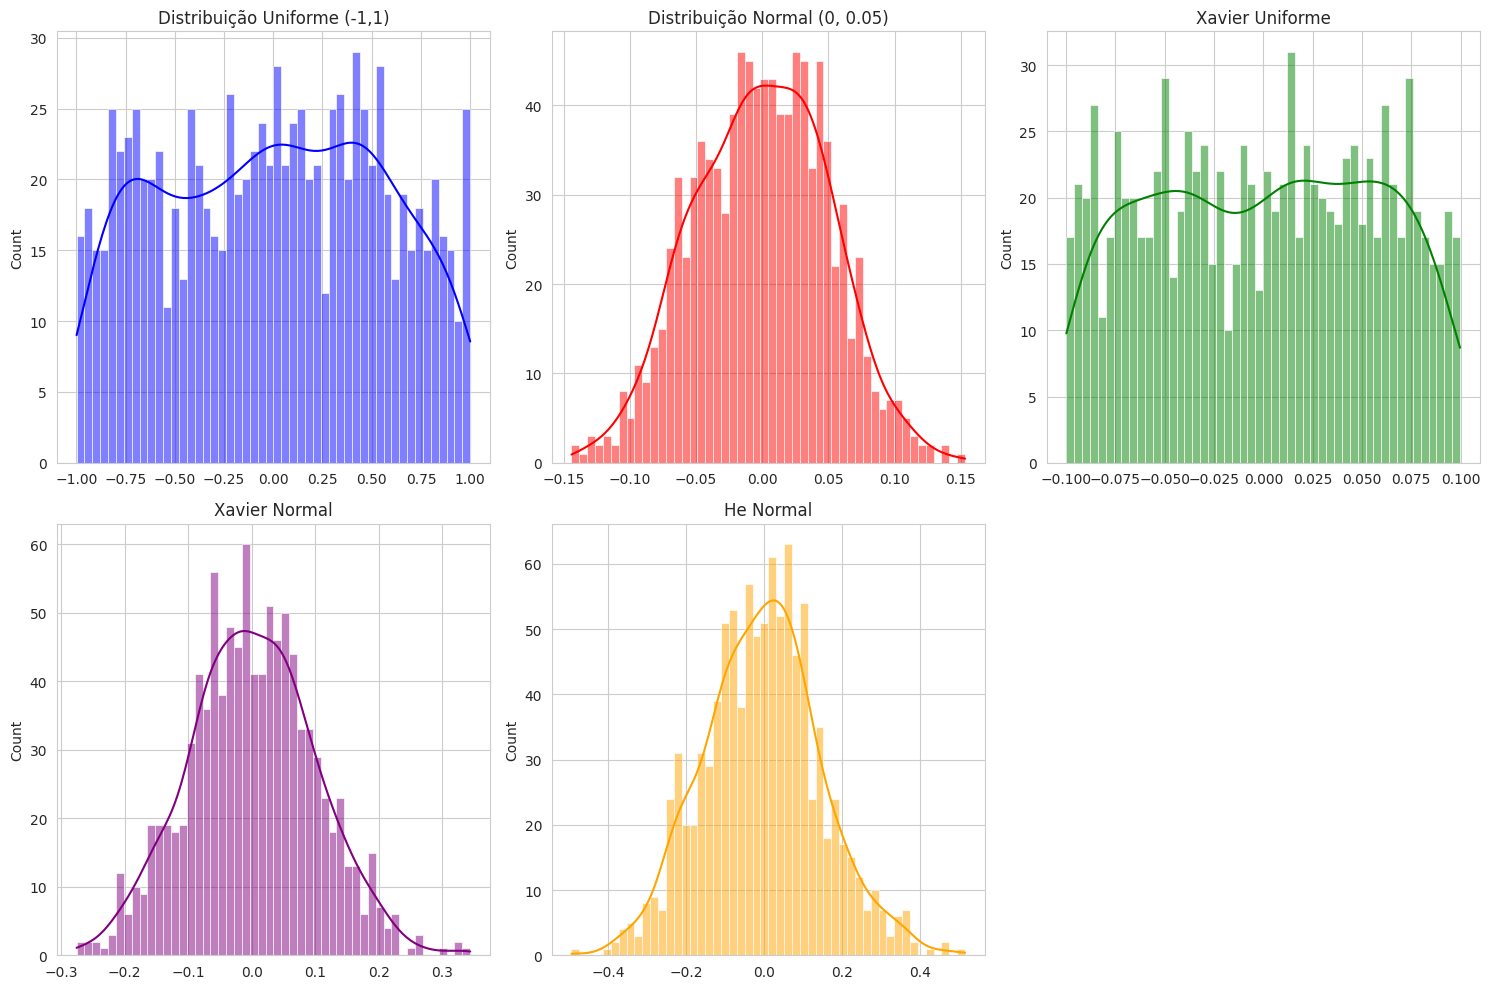

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# Definição dos parâmetros
num_pesos = 1000  # Quantidade de pesos a serem gerados
n_in = 100  # Número de neurônios na camada de entrada

# 📌 Inicialização Uniforme (-1, 1)
pesos_uniform = np.random.uniform(-1, 1, num_pesos)

# 📌 Inicialização Normal (Gaussiana) com média 0 e desvio padrão 0.05
pesos_normal = np.random.normal(0, 0.05, num_pesos)

# 📌 Inicialização Xavier Uniforme
limite_xavier = 1 / np.sqrt(n_in)
pesos_xavier = np.random.uniform(-limite_xavier, limite_xavier, num_pesos)

# 📌 Inicialização Xavier Normal
pesos_xavier_normal = np.random.normal(0, 1 / np.sqrt(n_in), num_pesos)

# 📌 Inicialização He Normal (para ReLU)
pesos_he = np.random.normal(0, np.sqrt(2 / n_in), num_pesos)

# 📌 Criando Gráficos para Visualizar as Distribuições
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico 1: Distribuição Uniforme (-1,1)
sns.histplot(pesos_uniform, bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribuição Uniforme (-1,1)")

# Gráfico 2: Distribuição Normal (0, 0.05)
sns.histplot(pesos_normal, bins=50, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title("Distribuição Normal (0, 0.05)")

# Gráfico 3: Xavier Uniforme
sns.histplot(pesos_xavier, bins=50, kde=True, ax=axes[0, 2], color="green")
axes[0, 2].set_title("Xavier Uniforme")

# Gráfico 4: Xavier Normal
sns.histplot(pesos_xavier_normal, bins=50, kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Xavier Normal")

# Gráfico 5: He Normal
sns.histplot(pesos_he, bins=50, kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("He Normal")

# Remover eixo extra
axes[1, 2].axis('off')

# Ajuste da disposição dos gráficos
plt.tight_layout()
plt.show()


#Impacto da Inicialização de Pesos



##Importância da inicialização de pesos


##Problemas causados por inicialização inadequada:


###Gradientes explosivos (exploding gradients)


###Gradientes desaparecendo (vanishing gradients)

##Testes práticos comparando os métodos de inicialização

##Gráficos de convergência e impacto na performance